In [2]:
import pandas as pd

In [39]:
import matplotlib.pyplot as plt

In [336]:
data = pd.read_csv('Ruter_data.csv',names=['TurId', 'Dato', 'Fylke', 'Område', 'Kommune', 'Holdeplass_Fra', 'Holdeplass_Til', 'Linjetype', 'Linjefylke', 'Linjenavn', 'Linjeretning', 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra', 'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra', 'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra', 'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra', 'Kjøretøy_Kapasitet', 'Passasjerer_Ombord'])

In [335]:
data.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10.08.2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15.08.2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03.08.2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27.07.2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27.08.2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


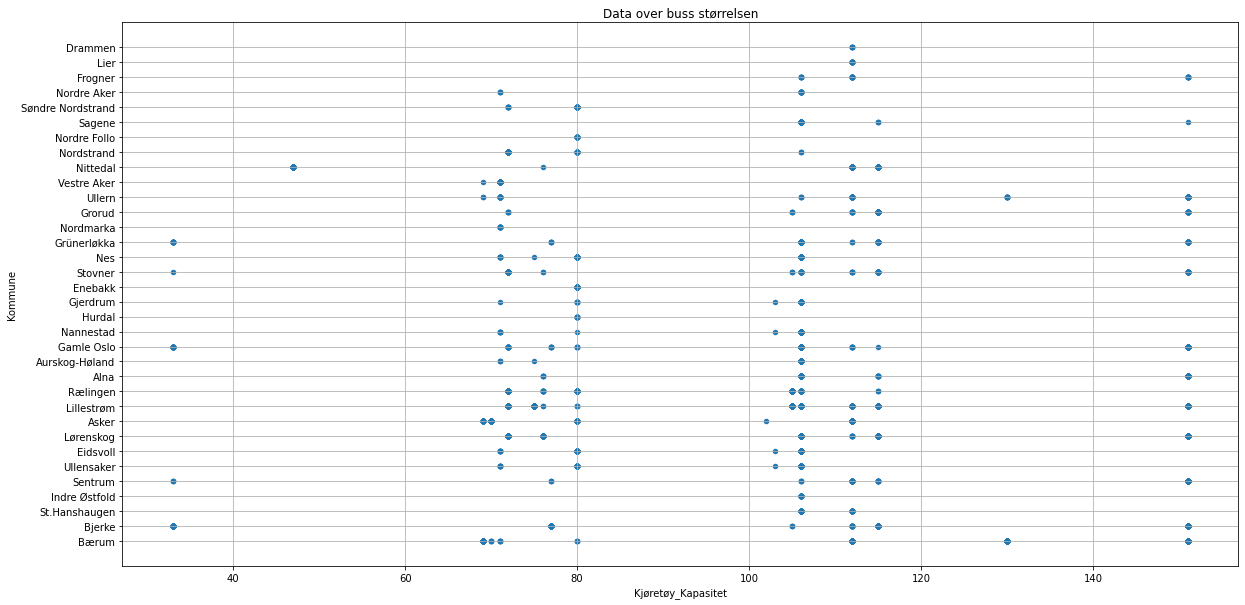

In [348]:
#First feature and visaulization: Bus capacity in relation of municipality
data.plot.scatter(x='Kjøretøy_Kapasitet', y='Kommune', title='Data over buss størrelsen', figsize= (20,10))
plt.grid()

Text(0, 0.5, 'Antall stopp')

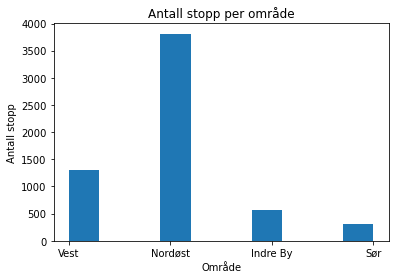

In [234]:
#Second feature and visualization: Number of stops in relation to area
fig,ax = plt.subplots()
ax.hist (data['Område'])
ax.set_title('Antall stopp per område')
ax.set_xlabel('Område')
ax.set_ylabel('Antall stopp')


In [304]:
#Third feature: Number of lines per municipality
linje = data[['Kommune', 'Linjenavn']]
linje = linje.drop_duplicates(subset=['Linjenavn'])

linje = linje.groupby("Kommune")
linje = linje.agg({"Linjenavn": "nunique"})
linje = linje.reset_index()
linje.sort_values(by="Kommune")
linje.rename(columns={"Linjenavn": "Antall linjer"})




,Kommune,Antall linjer
0,Alna,3
1,Asker,15
2,Aurskog-Høland,8
3,Bjerke,2
4,Bærum,13
5,Eidsvoll,9
6,Enebakk,3
7,Frogner,1
8,Gamle Oslo,3
9,Gjerdrum,4


Text(0, 0.5, 'Antall linjer')

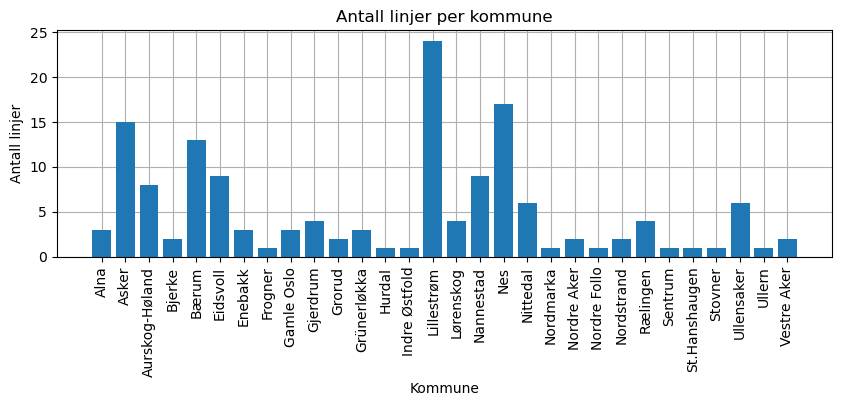

In [322]:
#Visualizing third feature
fig, ax = plt.subplots(figsize=(10,3), dpi=100)
x = linje['Kommune']
y = linje ['Linjenavn']
plt.grid()
plt.bar(x, y)
plt.xticks(rotation=90)

ax.set_axisbelow(True)
ax.set_title('Antall linjer per kommune')
ax.set_xlabel('Kommune')
ax.set_ylabel('Antall linjer')

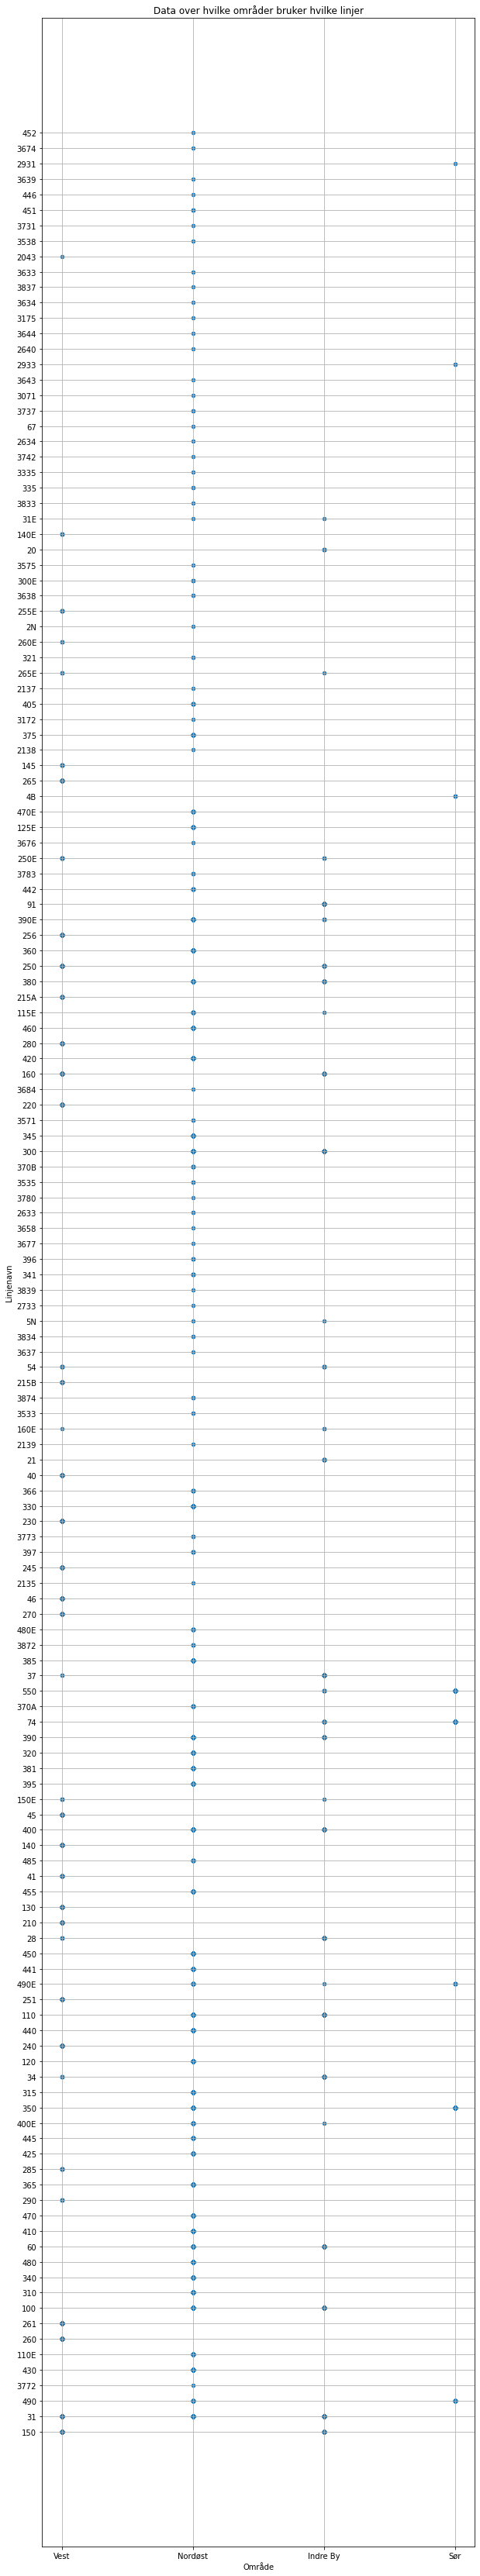

In [347]:
#Feature 4: Which areas uses which line numebers
data.plot.scatter(x='Område', y='Linjenavn', title='Data over hvilke områder bruker hvilke linjer', figsize= (10,60))
plt.grid()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

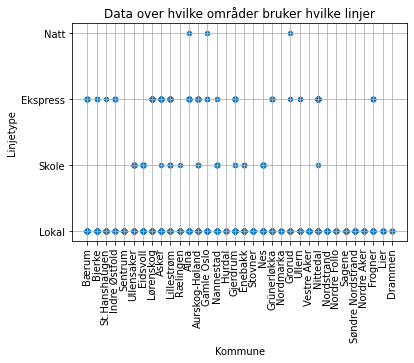

In [356]:
#Feature 5: Which municipality uses which linetypes
data.plot.scatter(x='Kommune', y='Linjetype', title='Data over hvilke kommuner bruker hvilke linjetyper')
plt.grid()
plt.xticks(rotation=90)
